<a href="https://colab.research.google.com/github/jaq0812/Tareas/blob/main/factores_calif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("calif.xlsx")

In [ ]:
print("Dimensiones del dataset:", df.shape)
df.columns = ['SOLICITUD', 'APARIENCIA', 'HABILIDAD', 'VERACIDAD', 'CONFIANZA', 'LUCIDEZ', 'HONESTIDAD',
              'VENTAS', 'EXPERIENCIA', 'MANEJO', 'AMBICION', 'SOLIDEZ', 'POTENCIA', 'GANA']
df.head()

Dimensiones del dataset: (48, 14)


,SOLICITUD,APARIENCIA,HABILIDAD,VERACIDAD,CONFIANZA,LUCIDEZ,HONESTIDAD,VENTAS,EXPERIENCIA,MANEJO,AMBICION,SOLIDEZ,POTENCIA,GANA
0,6,7,2,5.0,8.0,7.0,8,8.0,3.0,8,9.0,7,5.0,7.0
1,9,10,5,8.0,10.0,9.0,9,10.0,5.0,9,9.0,8,8.0,8.0
2,7,8,3,6.0,9.0,8.0,9,7.0,4.0,9,9.0,8,6.0,8.0
3,5,6,8,5.0,6.0,5.0,9,2.0,8.0,4,5.0,8,7.0,6.0
4,6,8,8,8.0,4.0,4.0,9,2.0,8.0,5,5.0,8,8.0,7.0


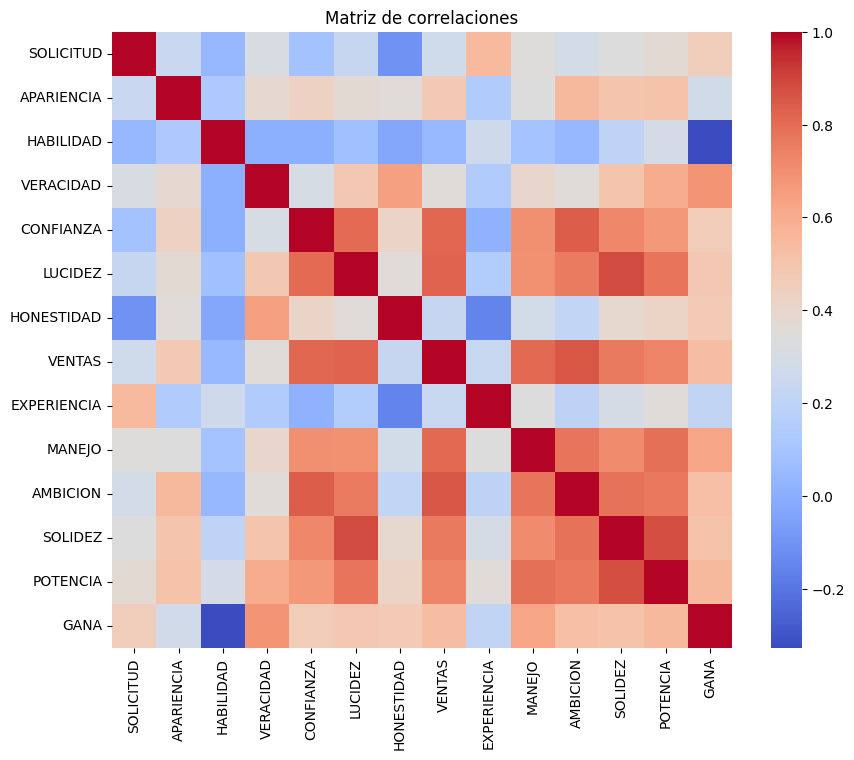

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de correlaciones")
plt.show()

In [ ]:
chi_square_value, p_value = calculate_bartlett_sphericity(df)
kmo_all, kmo_model = calculate_kmo(df)
print("Bartlett’s test p-value:", round(p_value,4))
print("KMO test:", round(kmo_model,4))

Bartlett’s test p-value: 0.0
KMO test: 0.793


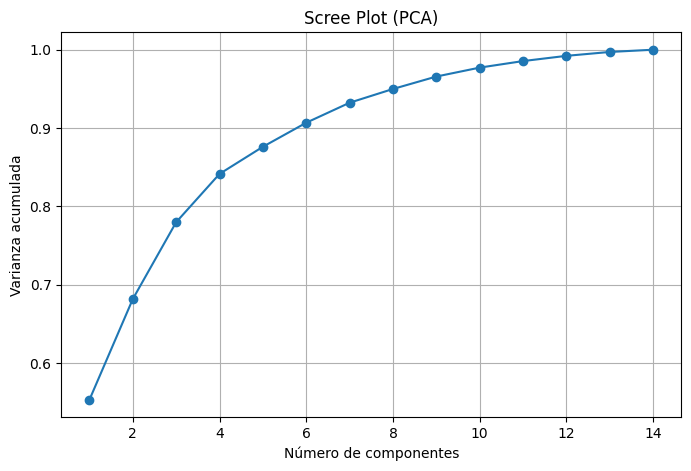

In [ ]:
pca = PCA()
pca.fit(df)

explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Scree Plot (PCA)')
plt.grid(True)
plt.show()

In [ ]:
print("Varianza explicada acumulada por PCA:")
for i, var in enumerate(explained_var):
    print(f"Componente {i+1}: {var:.3f}")

Varianza explicada acumulada por PCA:
Componente 1: 0.553
Componente 2: 0.682
Componente 3: 0.780
Componente 4: 0.842
Componente 5: 0.876
Componente 6: 0.907
Componente 7: 0.932
Componente 8: 0.950
Componente 9: 0.966
Componente 10: 0.977
Componente 11: 0.986
Componente 12: 0.992
Componente 13: 0.997
Componente 14: 1.000


In [ ]:
n_factors = 3

In [ ]:
fa_none = FactorAnalyzer(n_factors=n_factors, method='principal', rotation=None)
fa_none.fit(df)

print("\n=== Cargas factoriales (sin rotación) ===")
pd.DataFrame(fa_none.loadings_, index=df.columns, columns=[f'F{i+1}' for i in range(n_factors)])


=== Cargas factoriales (sin rotación) ===


,F1,F2,F3
SOLICITUD,0.405115,0.573667,0.521385
APARIENCIA,0.581477,-0.023201,-0.024850
HABILIDAD,0.098345,0.496370,-0.362666
VERACIDAD,0.623088,-0.254424,0.544274
CONFIANZA,0.825758,-0.219342,-0.351277
LUCIDEZ,0.875594,-0.075617,-0.209955
HONESTIDAD,0.468402,-0.618119,0.244183
VENTAS,0.881659,0.035431,-0.243457
EXPERIENCIA,0.309576,0.765017,0.290795
MANEJO,0.857377,0.116139,-0.057899


In [ ]:
fa_varimax = FactorAnalyzer(n_factors=n_factors, method='principal', rotation='varimax')
fa_varimax.fit(df)

print("\n=== Cargas factoriales (Varimax) ===")
pd.DataFrame(fa_varimax.loadings_, index=df.columns, columns=[f'F{i+1}' for i in range(n_factors)])


=== Cargas factoriales (Varimax) ===


,F1,F2,F3
SOLICITUD,0.144806,0.851948,0.135172
APARIENCIA,0.541800,0.126192,0.172628
HABILIDAD,0.225526,0.206745,-0.542195
VERACIDAD,0.354032,0.280750,0.738271
CONFIANZA,0.902146,-0.144935,0.136044
LUCIDEZ,0.886890,0.060512,0.161948
HONESTIDAD,0.343165,-0.214275,0.705281
VENTAS,0.903437,0.129452,0.069947
EXPERIENCIA,0.146722,0.843802,-0.179223
MANEJO,0.803983,0.290847,0.144755


In [ ]:
fa_promax = FactorAnalyzer(n_factors=n_factors, method='principal', rotation='promax')
fa_promax.fit(df)

print("\n=== Cargas factoriales (Promax) ===")
pd.DataFrame(fa_promax.loadings_, index=df.columns, columns=[f'F{i+1}' for i in range(n_factors)])


=== Cargas factoriales (Promax) ===


,F1,F2,F3
SOLICITUD,-0.103212,0.895298,0.128732
APARIENCIA,0.528092,0.033680,0.093350
HABILIDAD,0.324393,0.164230,-0.610320
VERACIDAD,0.141661,0.252916,0.726328
CONFIANZA,1.012282,-0.331526,-0.009137
LUCIDEZ,0.933079,-0.105871,0.023249
HONESTIDAD,0.272403,-0.280587,0.687496
VENTAS,0.954688,-0.037126,-0.076271
EXPERIENCIA,-0.023786,0.877728,-0.204969
MANEJO,0.782000,0.158911,0.021609


In [ ]:
fa_ml = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='promax')
fa_ml.fit(df)

print("\n=== Cargas factoriales (Máxima Verosimilitud + Promax) ===")
pd.DataFrame(fa_ml.loadings_, index=df.columns, columns=[f'F{i+1}' for i in range(n_factors)])


=== Cargas factoriales (Máxima Verosimilitud + Promax) ===


,F1,F2,F3
SOLICITUD,0.040904,-0.066385,0.657458
APARIENCIA,0.359706,0.245813,0.024062
HABILIDAD,-0.044368,0.010982,0.299327
VERACIDAD,-0.120635,0.806263,0.202683
CONFIANZA,1.112719,-0.048423,-0.403387
LUCIDEZ,0.877283,0.034941,-0.019108
HONESTIDAD,-0.105356,1.108660,-0.445299
VENTAS,1.017960,-0.169391,-0.011490
EXPERIENCIA,-0.018885,-0.101608,0.684466
MANEJO,0.772396,0.003290,0.144825


In [ ]:
def show_variance(fa, name):
    v = fa.get_factor_variance()
    print(f"\nVarianza explicada ({name}):")
    print(pd.DataFrame({
        'SS Loadings': v[0],
        'Proportion Var': v[1],
        'Cumulative Var': v[2]
    }, index=[f'F{i+1}' for i in range(n_factors)]))

show_variance(fa_none, "Sin rotación")
show_variance(fa_varimax, "Varimax")
show_variance(fa_promax, "Promax")
show_variance(fa_ml, "ML + Promax")


Varianza explicada (Sin rotación):
    SS Loadings  Proportion Var  Cumulative Var
F1     7.104019        0.507430        0.507430
F2     1.736565        0.124040        0.631470
F3     1.460873        0.104348        0.735818

Varianza explicada (Varimax):
    SS Loadings  Proportion Var  Cumulative Var
F1     6.169795        0.440700        0.440700
F2     2.045722        0.146123        0.586823
F3     2.085940        0.148996        0.735818

Varianza explicada (Promax):
    SS Loadings  Proportion Var  Cumulative Var
F1     6.293133        0.449510        0.449510
F2     2.035057        0.145361        0.594871
F3     1.964331        0.140309        0.735180

Varianza explicada (ML + Promax):
    SS Loadings  Proportion Var  Cumulative Var
F1     5.803381        0.414527        0.414527
F2     2.308268        0.164876        0.579404
F3     1.541915        0.110137        0.689540


In [ ]:
scores = fa_promax.transform(df)
scores_df = pd.DataFrame(scores, columns=[f'F{i+1}' for i in range(n_factors)])
print("\n=== Scores factoriales (Promax, regresión) ===")
scores_df.head()


=== Scores factoriales (Promax, regresión) ===


,F1,F2,F3
0,0.361255,-0.392404,0.790090
1,1.155608,0.669729,0.961791
2,0.663986,0.010865,1.035269
3,-0.210019,0.409432,-0.207605
4,-0.195443,0.972201,0.388510


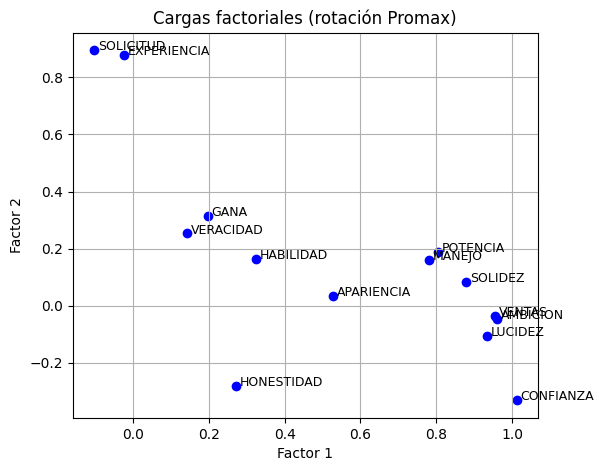

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(fa_promax.loadings_[:,0], fa_promax.loadings_[:,1], color='blue')
for i, var in enumerate(df.columns):
    plt.text(fa_promax.loadings_[i,0]+0.01, fa_promax.loadings_[i,1], var, fontsize=9)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Cargas factoriales (rotación Promax)')
plt.grid(True)
plt.show()

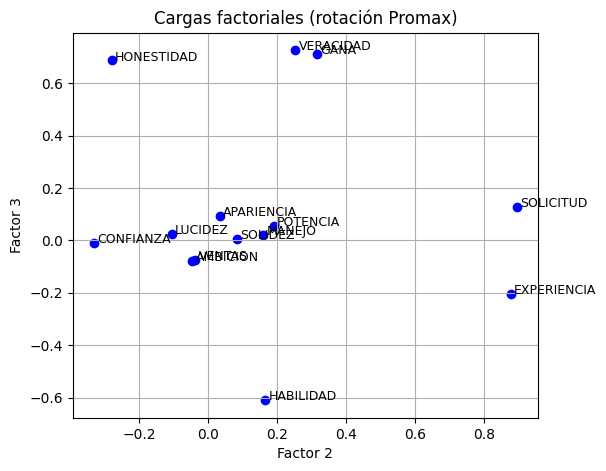

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(fa_promax.loadings_[:,1], fa_promax.loadings_[:,2], color='blue')
for i, var in enumerate(df.columns):
    plt.text(fa_promax.loadings_[i,1]+0.01, fa_promax.loadings_[i,2], var, fontsize=9)
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')
plt.title('Cargas factoriales (rotación Promax)')
plt.grid(True)
plt.show()

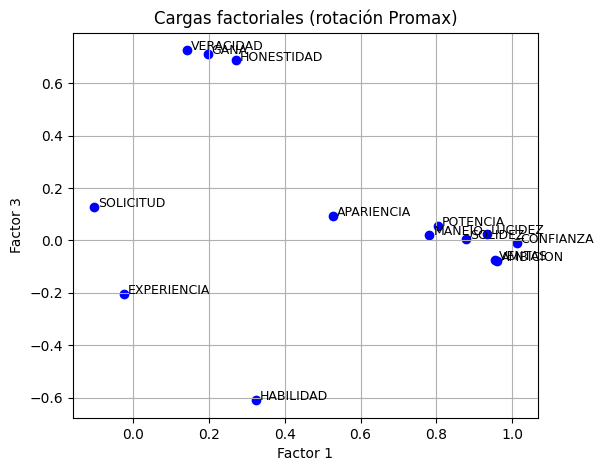

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(fa_promax.loadings_[:,0], fa_promax.loadings_[:,2], color='blue')
for i, var in enumerate(df.columns):
    plt.text(fa_promax.loadings_[i,0]+0.01, fa_promax.loadings_[i,2], var, fontsize=9)
plt.xlabel('Factor 1')
plt.ylabel('Factor 3')
plt.title('Cargas factoriales (rotación Promax)')
plt.grid(True)
plt.show()

In [ ]:
# Factor 1: "Potencia y Gestión Empresarial".
    # Este constructo parece representar la efectividad, el poder, el control y el empuje empresarial. Es una dimensión de "dureza" y "capacidad de gestión".

# Factor 2: "Experiencia y Proactividad"
    # Este es un factor muy limpio que parece representar la competencia demostrada y la diligencia.

# Factor 3: "Integridad vs. Habilidad"
    # Este factor representa una tensión entre dos conceptos. En un extremo está la integridad y la transparencia ('HONESTIDAD', 'VERACIDAD'). En el extremo opuesto está la 'HABILIDAD'.